# **Building a Digit Classifier with TensorFlow**
This notebook will guide you through building a simple image classification model using TensorFlow. We'll be classifying handwritten digits from the MNIST dataset, a popular benchmark for introduction to machine learning.

## **1: Importing Libraries**

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

### **Explanation:**

* We import `tensorflow` as tf for easier use.
* `tensorflow.keras.datasets `provides access to datasets like MNIST.
* `tensorflow.keras.models` allows us to build our classification model.
* `tensorflow.keras.layers` defines the building blocks of our model (Dense, Flatten).
* Finally, we print the TensorFlow version for reference.

## **2: Loading the MNIST Dataset**

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of training and testing data
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28), (60000,)
Testing data shape: (10000, 28, 28), (10000,)


### **Explanation:**

* `mnist.load_data()` loads the MNIST dataset, splitting it into training and testing sets.
* `x_train` and `x_test` contain the image data (handwritten digits). These are 28x28 pixel images, flattened into single arrays.
* `y_train` and `y_test` contain the corresponding labels (which digit the image represents). These are single integers (0-9).
* We print the shapes of the data to understand its dimensions.

## **3: Data Preprocessing**

In [ ]:
# Normalize the pixel values (between 0 and 1) for better training
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data for feeding into the neural network
# As our model expects a specific input format
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Print the shapes after reshaping
print(f"Reshaped training data: {x_train.shape}")
print(f"Reshaped testing data: {x_test.shape}")

Reshaped training data: (60000, 784)
Reshaped testing data: (10000, 784)


### **Explanation:**

* Pixel values in MNIST are between 0 and 255. We normalize them between 0 and 1 for better training performance.
* `astype('float32')` converts the data type to float for calculations.
* Our model expects a flattened image as input (28x28 pixels as a single array). We reshape the data accordingly.
* We print the data shapes after reshaping to confirm the changes.

## **4: Building the Classification Model**

In [ ]:
# Define a sequential model
model = Sequential()

# Flatten the input layer (28*28 pixels to single array)
model.add(Flatten(input_shape=(28 * 28,)))

# Add the first hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a second hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each digit 0-9)
# We use softmax activation for probability distribution
model.add(Dense(10, activation='softmax'))

### **Explanation:**

* We define a sequential model using `Sequential()`.
* The first layer (`Flatten`) flattens the 28x28 image into a single array.
* We add two hidden layers (`Dense`) with 128 and 64 neurons respectively. These layers learn complex patterns from the data.
* `activation='relu'` specifies the ReLU (Rectified Linear Unit) activation function for hidden layers, introducing non-linearity.
* The final output layer has 10 neurons, one for each digit (0-9).
* We use `activation='softmax'` here for multi-class classification problems

## **5: Compiling the Model**
Before training, we need to configure how the model should learn:

* **Optimizer:** The algorithm that updates model weights during training to reduce errors. _Adam_ is a smart and commonly used method that works well for most problems. ***Adam*** is an optimizer that automatically adjusts how much each weight moves during training by combining momentum and adaptive learning rates, making learning faster and more reliable.
* **Loss function:** How the model measures error and **Accuracy** reports how well the model's predictions aligned with actual target values.

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Summary shows the model architecture (layers and parameters)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Explanation:**

* `model.compile()` configures the model for the training process. Here's what we do:
    * **loss='categorical_crossentropy':** Used for multi-class classification (since we have 10 digits).
    * **optimizer='adam':** A popular optimization algorithm for updating model weights.
    * **metrics=['accuracy']**: We'll track accuracy while training.
* `model.summary() `prints a nice summary of our model's structure.

### **One-Hot Encoding the Labels**
The output layer uses a 'softmax' activation function, which means it expects our labels to be in a one-hot encoded format. Let's fix that:

In [ ]:
# Convert labels to one-hot encoded format to match model output shape
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### **Explanation:**

* We import `tf.keras.utils.to_categorical`.
* Before training, we convert the digit labels (`y_train` and `y_test`) into a one-hot encoded form. For example, if `y_train[0]` was the digit '3', it would convert to a vector of length 10: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0`] (only the position matching the digit 3 is 1).

### **Why is One-Hot Encoding Necessary?**

* Our model outputs probabilities associated with each class (0-9). To correctly calculate the loss ('categorical_crossentropy') during training, the true labels need to be in the same format – a vector indicating the correct class.
* One-hot encoding enables this format and makes the comparison between the model's prediction and the true label easier and more accurate.

## **6: Training the Model**

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2352 - accuracy: 0.9302 - val_loss: 0.1195 - val_accuracy: 0.9630
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0992 - accuracy: 0.9698 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0697 - accuracy: 0.9778 - val_loss: 0.0824 - val_accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0537 - accuracy: 0.9825 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0851 - val_accuracy: 0.9755


### **Explanation:**

* `model.fit()` starts the training process. Let's break down the arguments:
    * **x_train, y_train:** The training data.
    * **epochs=5:** We'll train our model for 5 iterations over the entire dataset.
    * **batch_size=32:** Process the data in batches of 32 samples at a time.
    * **validation_data=(x_test, y_test):** Use the testing data to evaluate our model after each epoch.

## **7: Evaluating the Model**

In [ ]:
# Evaluate the model's performance on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.2%}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9755
Test Loss: 0.0851
Test Accuracy: 97.55%


### **Explanation:**

* `model.evaluate()` calculates the model's loss and accuracy on the testing dataset.
* We print the test loss and test accuracy to see how well the model has performed.

## **8: Visualizing Results**

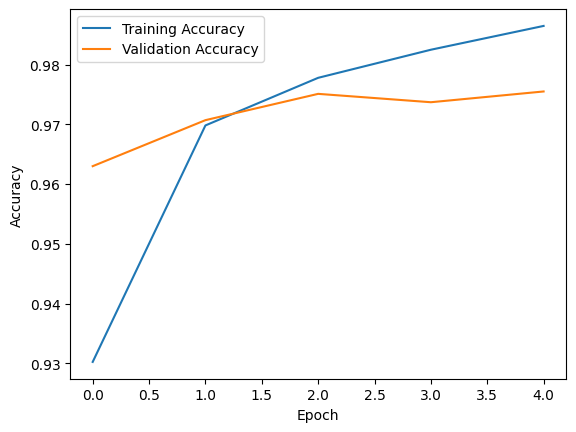

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Explanation:**

* We import `matplotlib.pyplot` for plotting.
* We plot the training accuracy and validation accuracy from the `history` object (created from `model.fit()`.
* Labels, legends, and titles are added for clarity.

## **9: Making Predictions**

1/1 [==============================] - 0s 86ms/step


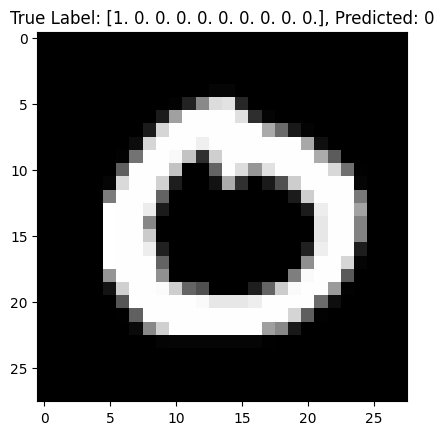

In [ ]:
import numpy as np

# Pick a random sample index
random_idx = np.random.randint(len(x_test))

# Get the image and its true label (what digit it represents)
test_image = x_test[random_idx]
true_label = y_test[random_idx]

# Reshape image for single sample prediction
test_image = test_image.reshape(1, 28*28)

# Prediction by the model
predictions = model.predict(test_image)
predicted_label = np.argmax(predictions[0])

# Let's visualize!
plt.imshow(test_image.reshape(28, 28), cmap="gray")
plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
plt.show()

### **Explanation:**

* We randomly pick an image from the testing set.
* We reshape the image since our model expects input in a specific shape.
* We make a prediction using `model.predict()`.
* `np.argmax` gives the index of the class with the highest probability (our predicted digit).
* We visualize the image and its true and predicted labels.

**Conclusion**

In this exercise, we built a simple image classification model using TensorFlow to classify handwritten digits from the MNIST dataset. We explored the fundamental concepts of loading data, creating a model with hidden layers, training, evaluating, and making predictions. This example serves as a solid foundation for understanding the basics of image classification with neural networks.

**Next Steps: Exploring Deeper**

If you want to extend your knowledge and dive deeper into image classification, consider these next steps:

* **Experiment with Model Architecture:** Try adding more hidden layers, changing the number of neurons, and using different activation functions. Analyze how these changes affect the model's performance.

* **Explore Convolutional Neural Networks (CNNs):** CNNs are extremely powerful for image classification. Get started with this guide: [https://www.tensorflow.org/tutorials/images/cnn](https://www.tensorflow.org/tutorials/images/cnn)

* **Tackle More Complex Datasets:** Challenge yourself with datasets like CIFAR-10 ([https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html))  or ImageNet ([http://image-net.org/](http://image-net.org/)) for color image classification at a larger scale.

**Remember, practice and experimentation are key to developing your skills in machine learning! Enjoy the journey!**
